In [ ]:
import numpy as np
import cv2
import math
import os

import random

from matplotlib import pyplot as plt
from collections import deque
from google.colab import drive
from google.colab.patches import cv2_imshow

from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
house32 = cv2.imread('/content/drive/My Drive/Colab Notebooks/BV2/Testbilder/house32.png', cv2.IMREAD_COLOR)
koeln = cv2.imread('/content/drive/My Drive/Colab Notebooks/BV2/Testbilder/koeln.png', cv2.IMREAD_COLOR)

In [ ]:
# Katzenbilder einlesen
folder_path = '/content/drive/My Drive/Colab Notebooks/BV2/Testbilder/cat/'

cat_image_list = []

for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        cat_image_list.append(img)

# Konvertiere die Liste in ein NumPy-Array
cat_image_array = np.array(cat_image_list)


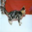

In [ ]:
cv2_imshow(cat_image_array[1])

In [ ]:
sub_images = 0
def create_mosaik(src_img, cat_images):

  #Eingangsbild in Kacheln zerlegen
  patch_dim = cat_images[0].shape[0]
  sub_images = np.array((src_img.shape[0]/patch_dim, src_img.shape[1]/patch_dim))
  result_lut = np.zeros_like(sub_images)

  for y in range(0, src_img.shape[0], patch_dim):
    for x in range(0, src_img.shape[1], patch_dim):
        # Schneiden und Speichern des Subbildes
        sub_images[(y//patch_dim)][(x//patch_dim)] = src_img[y:y+patch_dim, x:x+patch_dim]

  # Durschnittsfarbwinkel für alle Katzenbilder berechnen
  cat_lut = []
  for i in cat_images:
    patch_hsv = cv2.cvtColor(i, cv2.COLOR_BGR2HSV)
    avv_hue = np.sum(patch_hsv[:, :, 0])/(patch_dim*patch_dim)
    cat_lut.append([avv_hue])

  cat_lut_np = np.array(cat_lut)

# Zuordnung Eingangspatch/Kacheln zu einem Katzenbld
  for i in sub_images:
    patch_hsv = cv2.cvtColor(i, cv2.COLOR_BGR2HSV)
    avv_hue = np.sum(patch_hsv[:, :, 0])/(patch_dim*patch_dim)
    index_of_closest_value = np.argmin(np.abs(cat_lut_np - avv_hue))
    result_lut.append(index_of_closest_value)


  for y in range(sub_images.shape[0]):
    for x in range(sub_images.shape[1]):
      patch_hsv = cv2.cvtColor(sub_images[y][x], cv2.COLOR_BGR2HSV)
      avv_hue = np.sum(patch_hsv[:, :, 0])/(patch_dim*patch_dim)
      result_lut[y][x] = np.argmin(np.abs(cat_lut_np - avv_hue)) # index_of_closest_value


# Erstellung Mosaikbild
  result_image = np.zeros_like(src_img)
  for y in range(result_lut.shape[0]):
    for x in range(result_lut.shape[0]):
      y_patch_steps = y * patch_dim
      x_patch_steps = x * patch_dim
      result_image[y_patch_steps:y_patch_steps+patch_dim, x_patch_steps:x_patch_steps+patch_dim] = cat_images[result_lut[y][x]]

  cv2.imwrite(f'/content/drive/My Drive/Colab Notebooks/BV2/mosaik.png', result_image)

In [ ]:
create_mosaik(house32, cat_image_array)

TypeError: ignored

In [ ]:
#cv2_imshow(house32)

Aufgabe 2

In [ ]:
birne = cv2.imread('/content/drive/My Drive/Colab Notebooks/BV2/Testbilder/Birne1.png', cv2.IMREAD_GRAYSCALE)

In [ ]:
otsu_birne_value, otsu_birne = cv2.threshold(birne,0,255,cv2.THRESH_OTSU)
#cv2_imshow(otsu_birne_value)
print(otsu_birne_value)
cv2.imwrite(f'/content/drive/My Drive/Colab Notebooks/BV2/otsu_birne1.png', otsu_birne)

136.0


True

In [ ]:

          # Überprüfen der Form des Subbilds (für den Fall, dass das Originalbild nicht gleichmäßig teilbar ist)
          #if patch.shape == (patch_dim, patch_dim, 3):
           # sub_images.append(patch)

             #cv2_imshow(sub_images_array[120])
  #cv2_imshow(cat_images[120])
  #print(ssim(sub_images_array[0], cat_images[0])) geht nur mit ungeraden Bildern

In [ ]:
cat_lut = []
result_lut = []

def create_mosaik_rgb(src_img, cat_images):

  #Eingangsbild in Kacheln zerlegen
  patch_dim = cat_images[0].shape[0]
  sub_images = []

  for i in range(0, src_img.shape[0], patch_dim):
    for j in range(0, src_img.shape[1], patch_dim):
        # Schneiden und Speichern des Subbildes
        patch = src_img[i:i+patch_dim, j:j+patch_dim]
        sub_images.append(patch)

  sub_images_array = np.array(sub_images)

  # Durschnittsfarbwinkel für alle Katzenbilder berechnen
  for i in cat_images:
    average_rgb = np.mean(i, axis=(0, 1))
    cat_lut.append([average_rgb])

  cat_lut_np = np.array(cat_lut)

# Zuordnung Eingangspatch/Kacheln zu einem Katzenbld
  for i in sub_images_array:
    average_rgb = np.mean(i, axis=(0, 1))
    index_of_closest_value = np.argmin(np.abs(cat_lut_np - average_rgb))
    result_lut.append(index_of_closest_value)


# Erstellung Mosaikbild
  counter = 0
  result_image = np.zeros_like(src_img)
  for i in range(0, src_img.shape[0], patch_dim):
    for j in range(0, src_img.shape[1], patch_dim):
        # Schneiden und Speichern des Subbildes
        result_image[i:i+patch_dim, j:j+patch_dim] = cat_images[result_lut[counter]]
        counter+=1


  cv2.imwrite(f'/content/drive/My Drive/Colab Notebooks/BV2/mosaik_rgb.png', result_image)


In [ ]:
create_mosaik_rgb(house32, cat_image_array)

IndexError: ignored

In [ ]:
cat_lut = []
result_lut = []

def create_mosaik_old(src_img, cat_images):

  #Eingangsbild in Kacheln zerlegen
  patch_dim = cat_images[0].shape[0]
  sub_images = []

  for i in range(0, src_img.shape[0], patch_dim):
    for j in range(0, src_img.shape[1], patch_dim):
        # Schneiden und Speichern des Subbildes
        patch = src_img[i:i+patch_dim, j:j+patch_dim]
        sub_images.append(patch)

  sub_images_array = np.array(sub_images)

  # Durschnittsfarbwinkel für alle Katzenbilder berechnen
  for cat_index, i in enumerate(cat_images):
    patch_hsv = cv2.cvtColor(i, cv2.COLOR_BGR2HSV)
    avv_hue = np.sum(patch_hsv[:, :, 0])/(patch_dim*patch_dim)
    cat_lut.append([avv_hue])

  cat_lut_np = np.array(cat_lut)

# Zuordnung Eingangspatch/Kacheln zu einem Katzenbld
  for i in sub_images_array:
    patch_hsv = cv2.cvtColor(i, cv2.COLOR_BGR2HSV)
    avv_hue = np.sum(patch_hsv[:, :, 0])/(patch_dim*patch_dim)
    index_of_closest_value = np.argmin(np.abs(cat_lut_np - avv_hue))
    result_lut.append(index_of_closest_value)


# Erstellung Mosaikbild
  counter = 0
  result_image = np.zeros_like(src_img)
  for i in range(0, src_img.shape[0], patch_dim):
    for j in range(0, src_img.shape[1], patch_dim):
        # Schneiden und Speichern des Subbildes
        result_image[i:i+patch_dim, j:j+patch_dim] = cat_images[result_lut[counter]]
        counter+=1


  cv2.imwrite(f'/content/drive/My Drive/Colab Notebooks/BV2/mosaik.png', result_image)
